In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plateaumodules as pm

workdir="/mnt/solexa/mel_yang/aPlateau/rev_072418/outf3/"
low=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40",#"ZongriM78", #
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",# #"XiahaishiM22",
     "Hupo-a","Sanheyi11",  #"Hupo14","Shangluzhuang0", #
     "Wuba","HuoshaogouM117",
     "Jinchankou0","QijiapingM108-2","QijiapingM89-2","QijiapingM104-2", # #"Wenpuju03",
     "Lajigai-a","Lierbao0","Hedong4"] #"Qunke1","Hupo8", #"Lajigai2",
high=["PukagongmaM1","PukagongmaM5", #"PukagongmaM3", #"PukagongmaM2",
     "Butaxiongqu","RedilongM3","XiaoendaM2", #"XiaoendaM1", #
     "Chokhopani","Mebrak","Samdzong","CaixiutangJ2-13","YushuSGZ-1"]
eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
eas=["Han","She","Miao","Tujia","Naxi","Yi","Tu","Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX"]
pops=low+high+eas+tib
fh="UPA16.f3.T_Mbuti_S1_aTib+More_S2_aTib+More.log"

name="aTib+subEA"
out="Mbuti"
mypops1=[pops,pops,out]
DorZ="f3"


newfh1=fh.split(".")[0]+"."+DorZ+"."+"%s_%s_%s" % (name,name,out)
f3ary = pm.mkf3ary(workdir,fh,mypops1,2,(0,1),DorZ)    

f3dat=pd.DataFrame(f3ary)
rownames={ind:pops[ind] for ind in range(len(pops))}
f3dat=f3dat.rename(rownames, axis='columns')
f3dat=f3dat.rename(rownames, axis='index')

f3dat.to_csv(workdir+newfh1+".csv", sep='\t')

In [93]:
target=["ZongriM32","Zongri-b","Zongri-c"]
low=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40",#"ZongriM78", #
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",# #"XiahaishiM22",
     "Hupo-a","Sanheyi11",  #"Hupo14","Shangluzhuang0", #
     "Wuba","HuoshaogouM117",
     "Jinchankou0","QijiapingM108-2","QijiapingM89-2","QijiapingM104-2", # #"Wenpuju03",
     "Lajigai-a"] #"Qunke1","Hupo8", #"Lajigai2",
high=["PukagongmaM1","PukagongmaM5", #"PukagongmaM3", #"PukagongmaM2",
     "Butaxiongqu","RedilongM3","XiaoendaM2", #"XiaoendaM1", #
     "CaixiutangJ2-13","YushuSGZ-1"] #
target1=["Daxiang0","LiuwanQH-1","Hejiatai","Hedong6","XiahaishiM9","Sanheyi11","Wuba","HuoshaogouM117","Hupo-a"]
target1=low+high
target1=["Chokhopani","Mebrak","Samdzong"]
target1=["Han","Miao","She","Tujia","Lierbao0","Hedong4"]
target2=["QijiapingM104-2","Jinchankou0","QijiapingM89-2","QijiapingM108-2"]
subary = f3ary[[pops.index(i) for i in target1],:][:,[pops.index(i) for i in target2]]
print subary[~np.isnan(subary)].mean()
print subary[~np.isnan(subary)].std()
print subary[~np.isnan(subary)].max()
print subary[~np.isnan(subary)].min()
print subary

0.300015541667
0.00264062992767
0.30482
0.293724
[[ 0.30482   0.301988  0.298545  0.298812]
 [ 0.302263  0.301808  0.297662  0.300053]
 [ 0.304256  0.299572  0.296395  0.296248]
 [ 0.304     0.301061  0.298505  0.300012]
 [ 0.301915  0.299855  0.299488  0.293724]
 [ 0.301939  0.297251  0.3014    0.298801]]


In [77]:
print f3ary[~np.isnan(f3ary)].mean()
print f3ary[~np.isnan(f3ary)].std()
print f3ary[~np.isnan(f3ary)].max()
print f3ary[~np.isnan(f3ary)].min()

0.295521348792
0.00709438133325
0.325966
0.275391


In [50]:
%%writefile /mnt/solexa/mel_yang/aPlateau/rev_072418/outf3/makeheatmap.R


library(gplots)
pd="/mnt/solexa/mel_yang/aPlateau/rev_072418/outf3/"
fh="UPA16.f3."
name="aTib+subEA_aTib+subEA_Mbuti"
#name="aTib+EA_aTib+EA_Mbuti"
#name="aTib_aTib_Mbuti"
myfile=read.csv(paste(pd,fh,name,".csv",sep=""),sep="\t",header=T)

mydat=subset(myfile, select = -c(X) )
rownames(mydat)=colnames(mydat)
pdf(paste(pd,fh,name,".pdf",sep=""))
#mydat[is.na(mydat)] <- 0
mydat=data.matrix(mydat)
v=heatmap.2(mydat,symkey=FALSE, trace="none")
x=rownames(mydat)[v$rowInd]
mynames=data.frame(x)
write.table(mynames,paste(pd,fh,name,".sorted.txt",sep=""),sep="\t",row.names=F,quote=F)
dev.off()

Overwriting /mnt/solexa/mel_yang/aPlateau/rev_072418/outf3/makeheatmap.R


In [22]:
%%bash
R CMD BATCH /mnt/solexa/mel_yang/aPlateau/rev_072418/outf3/makeheatmap.R

In [47]:

print mylst

['Hedong4', 'Lierbao0', 'Mebrak', 'Chokhopani', 'Samdzong', 'HuoshaogouM117', 'Wuba', 'Hupo-a', 'Daxiang0', 'XiahaishiM9', 'Hedong6', 'Sanheyi11', 'Hejiatai', 'LiuwanQH-1', 'Zongri-c', 'Zongri-b', 'ZongriM32', 'PukagongmaM1', 'ZongriM40', 'PukagongmaM5', 'Zongri-a', 'Butaxiongqu', 'XiaoendaM2', 'RedilongM3', 'CaixiutangJ2-13', 'YushuSGZ-1', 'QijiapingM108-2', 'Lajigai-a', 'Jinchankou0', 'QijiapingM104-2', 'QijiapingM89-2']


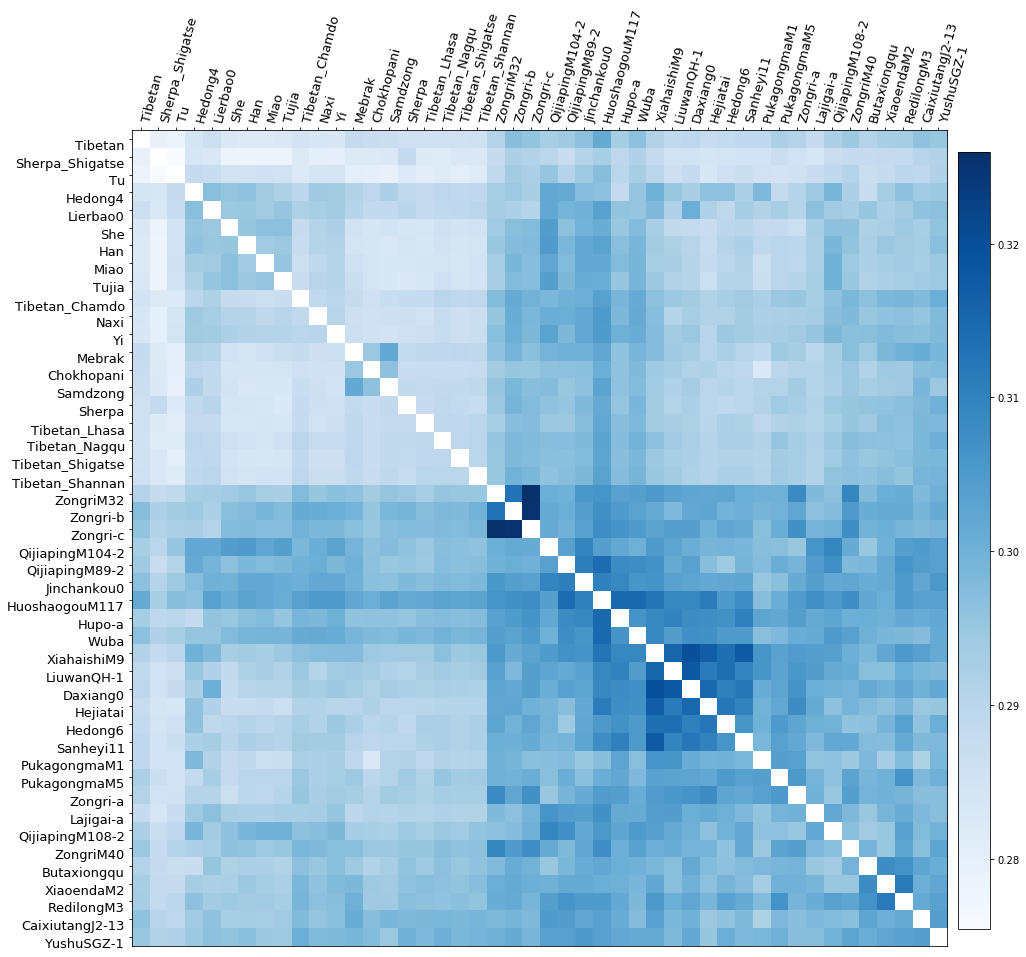

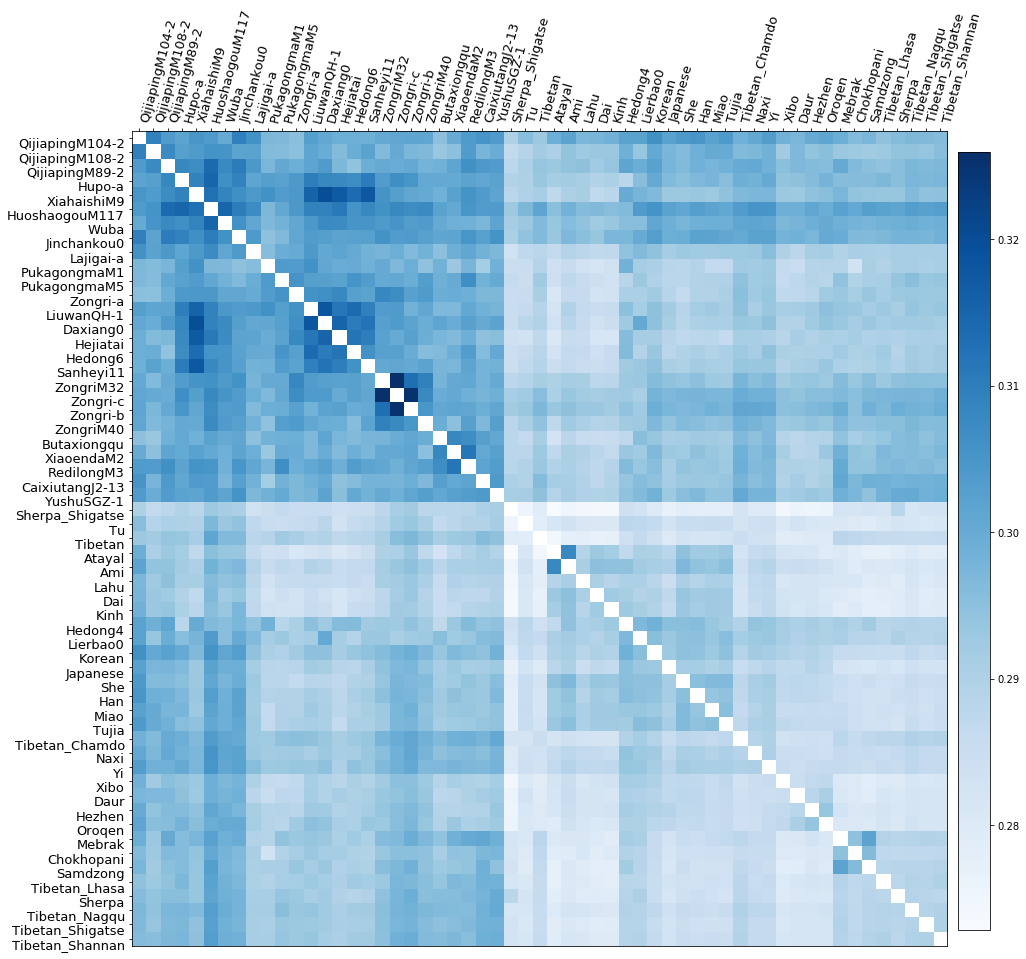

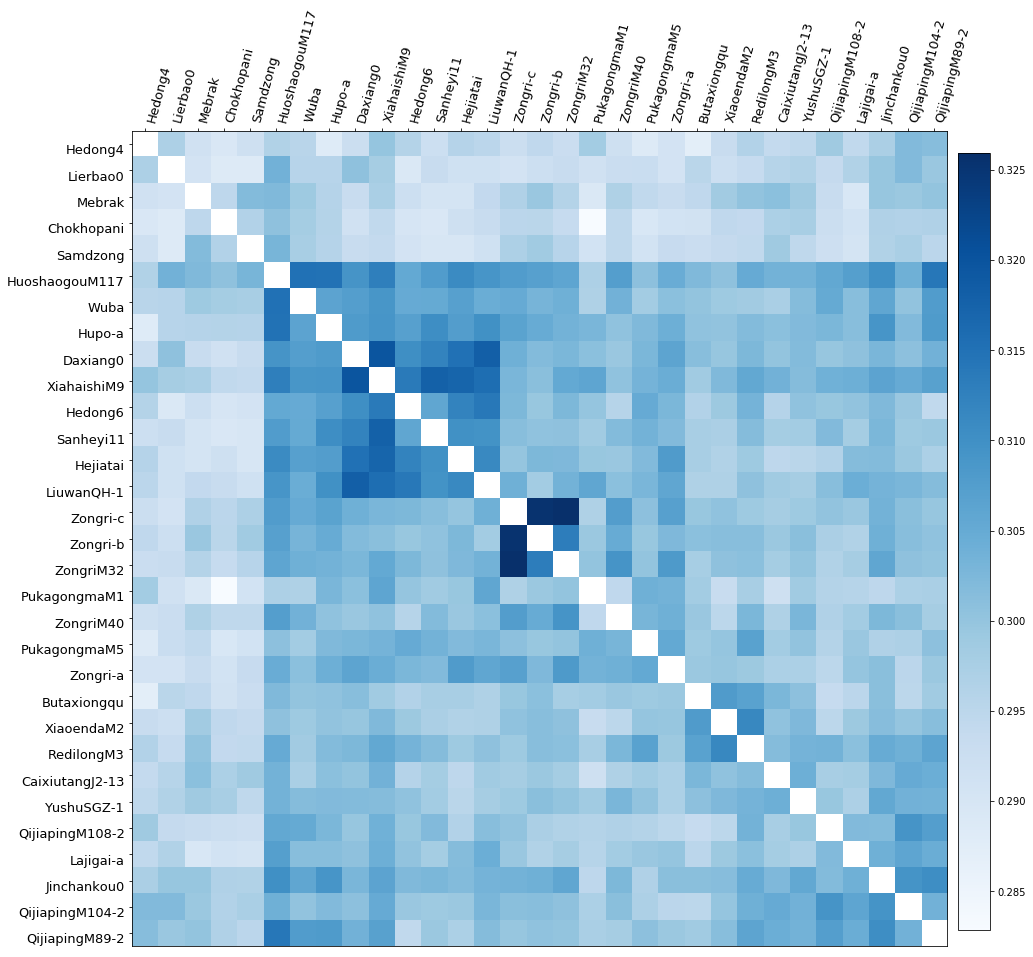

In [60]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt

fh="UPA16.f3.T_Mbuti_S1_aTib+More_S2_aTib+More.log"
pD="/mnt/solexa/mel_yang/aPlateau/rev_072418/outf3/"
names=["aTib+subEA_aTib+subEA_Mbuti","aTib+EA_aTib+EA_Mbuti","aTib_aTib_Mbuti"]
for name in names:
    orderedfile=open(pD+"UPA16.f3.%s.sorted.txt" % (name),'r')
    mylst=[line.strip().replace('.','-') for ind,line in enumerate(orderedfile) if ind!=0]
    orderedfile.close()

    pops,name=mylst,"aGQ"
    out="Mbuti"
    mypops1=[pops,pops,out]
    DorZ="f3"

    f3ary = pm.mkf3ary(pD,fh,mypops1,2,(0,1),DorZ)    
    #print pm.Zmat2xlsx(f3ary,pD+newfh1,pops,pops,0,1)

    fig,ax = plt.subplots(figsize=(15,15))
    fs=13
    plt.imshow(f3ary, cmap='Blues', interpolation='nearest')
    # We want to show all ticks...
    
    ax.set_xticks(np.arange(len(mypops1[0])))
    ax.set_yticks(np.arange(len(mypops1[1])))
    # ... and label them with the respective list entries
    
    formattednames=[i[:-1] if i[-1]=="X" else i for i in mypops1[0]]
    ax.set_xticklabels(formattednames, minor=False,fontsize=fs,rotation=75,ha='left')
    ax.set_yticklabels(formattednames, minor=False,fontsize=fs,va='top')
    #ax.invert_yaxis()
    ax.xaxis.tick_top()
    cax=fig.add_axes([0.9, 0.14, 0.03, 0.72])
    #fig.colorbar(ax,cax=cax)
    plt.colorbar(cax=cax)
plt.show()

In [4]:
import numpy as np
import plateaumodules as pm

datpd="/mnt/solexa/mel_yang/aPlateau/update051518/"
outpd="/mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_AA/"
outpd="/mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/"
fh,tv,out=("complete2.dstat.log","","Mbuti")
#fh,tv=("complete.tv.dstat.log",".tv")

low=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40",#"ZongriM78",
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",#"XiahaishiM22",
     "Hupo-a","Sanheyi11",  #"Hupo14","Shangluzhuang0",
     "Wuba","HuoshaogouM117",
     "Jinchankou0","QijiapingM108-2","QijiapingM89-2","QijiapingM104-2", #"Wenpuju03",
     "Lajigai-a","Lierbao0"] #"Qunke1","Hupo8","Lajigai2","Hedong4",
high=["PukagongmaM1","PukagongmaM5", #"PukagongmaM2","PukagongmaM3",
     "Butaxiongqu","RedilongM3","XiaoendaM2", #"XiaoendaM1",
     "Chokhopani","Mebrak","Samdzong","CaixiutangJ2-13","YushuSGZ-1"]
eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX"]
eas=["Daur","Han","Dai","Ami","Naxi","Yi","Tu","Sherpa",
     "Tibetan","Tibetan_ChamdoX","Tibetan_ShannanX","Tibetan_ShigatseX"]
others=["ZongriM78","XiahaishiM22","Hupo14","Shangluzhuang0","Wenpuju03","Qunke1","Hupo8","Lajigai2","Hedong4",
       "PukagongmaM2","PukagongmaM3","XiaoendaM1"]
#agq=["Zongri1a","Zongri23","Shangluzhuang","Heodong"]
popA=low+high
popB=low+high
thirdpops=others+low+high
for myind in thirdpops:
    #myind="Shangluzhuang"
    #myind="Hejiatai"
    
    mypops1=[popA,myind,popB,out]
    mypops2=[popA,popB,myind,out]
    DorZ="Z"

    #newfh1=fh.split(".")[0]+tv+DorZ+"."+"aTib_%s_aTib_%s" % (myind,out)
    newfh2=fh.split(".")[0]+tv+DorZ+"."+"aTib_aTib_%s_%s" % (myind,out)
    #Zary = pm.mkDary(datpd,fh,mypops1,(1,3),(0,2),DorZ)    
    #print pm.Zmat2xlsx(Zary,outpd+newfh1,popA,popB,0,2)

    Zary = pm.mkDary(datpd,fh,mypops2,(2,3),(0,1),DorZ)   
    print pm.Zmat2xlsx(Zary,outpd+newfh2,popA,popB,0,1)

Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2Z.aTib_aTib_ZongriM78_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2Z.aTib_aTib_XiahaishiM22_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2Z.aTib_aTib_Hupo14_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2Z.aTib_aTib_Shangluzhuang0_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2Z.aTib_aTib_Wenpuju03_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2Z.aTib_aTib_Qunke1_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2Z.aTib_aTib_Hupo8_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2Z.aTib_aTib_Lajigai2_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2Z.aTib_aTib_Hedong4_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2Z.aTib_aTib_PukagongmaM2_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/rev_072418/D_SI_5/complete2Z.aTib_aTib_PukagongmaM3_Mbuti